In [1]:
import os
import pandas as pd 


df = pd.read_parquet("spam.parquet")

In [2]:
df

,receive_time,report_time,spam_type,ad_type,content
0,2022-09-22 15:39:00,2022-09-23 02:59:34,문자,불법대출,"""50,000""원으로""200,000""원 만들기!!""무료 상담"" 기회https://b..."
1,2022-09-22 15:33:00,2022-09-22 19:09:38,문자,불법대출,"""50,000""원으로""200,000""원 만들기!!""무료 상담"" 기회https://b..."
2,2021-08-07 11:20:00,2021-08-28 20:48:09,문자,부동산,"""8월 이벤트! 1타 부동산 유튜브 온라인강의”[선착순 30명 : 50% 할인]y..."
3,2022-04-04 19:16:00,2022-04-04 22:47:24,문자,기타,"""S휘트니스 안내문""QR코드 인증중단평일 저녁12까지 연장1개월 19,000원 4/..."
4,2021-12-01 13:01:00,2021-12-01 22:13:50,문자,불법대출,"""esia golf""\n\n▶회원님께 드리는 이달의 이벤트\n\n12월 BC카드로 ..."
...,...,...,...,...,...
488318,2021-09-14 15:41:00,2021-09-14 17:21:40,문자,기타,힘든내가 성공할수있던방법\n지금바로 시작하세요\n9월 당신의행복시작입니다.\nhtt...
488319,2022-03-31 09:19:00,2022-04-12 10:56:50,MMS,기타,（광고)(주)다인대부중개담당자:다담론직통번호:02-2135-2219이연수님~오늘하루...
488320,2022-04-09 13:09:00,2022-04-18 19:57:14,문자,기타,"？№┴ц*хи└Ч┴Ш5,500*хи？№？с12,500*хи？Ц？ы6,000*хихЬ..."
488321,2021-12-11 16:35:00,2021-12-12 13:29:53,문자,기타,？？？？？？？？~12？？？？ ？？？？？？？？？？!!？？？？？？？ ？？？？？？？？？!...


In [14]:
df["전문내용"].apply(lambda x : len(x)==400)

0        False
1        False
2         True
3         True
4         True
         ...  
95149     True
95150     True
95151    False
95152     True
95153    False
Name: 전문내용, Length: 95154, dtype: bool

In [20]:
# -*- coding: 949 -*-
s = "안녕하세요"

print(len(s.encode('cp949')))

10


In [21]:
print(len(df.loc[ 95150 , "전문내용"].encode('cp949')))

672


## 스팸 유형별 개수

In [4]:
from collections import Counter
spam_type = df["스팸유형"].to_list()
Counter(spam_type)

KeyError: '스팸유형'

In [83]:
ad_type_cnt = df["광고유형"].to_list()
ad_type = Counter(ad_type_cnt).keys()
Counter(ad_type_cnt)

Counter({'기타': 43484,
         '도박': 17859,
         '주식': 3881,
         '성인': 8500,
         '불법대출': 15871,
         '대리운전': 1750,
         '금융': 818,
         '유흥업소': 147,
         '비스팸': 449,
         '부동산': 992,
         '통신가입': 101,
         '확인불가': 655,
         '게임': 12,
         '약품': 632,
         '운세': 1,
         None: 2})

In [69]:
sorted(Counter(df[df["스팸유형"] == "문자"]["광고유형"].to_list()).items(), key=lambda x: x[1], reverse=True)

[('기타', 16230),
 ('도박', 6712),
 ('주식', 3879),
 ('불법대출', 2131),
 ('대리운전', 1558),
 ('금융', 815),
 ('성인', 708),
 ('확인불가', 655),
 ('약품', 601),
 ('비스팸', 405),
 ('부동산', 321),
 ('유흥업소', 133),
 ('통신가입', 87),
 ('게임', 11),
 (None, 2),
 ('운세', 1)]

In [70]:
sorted(Counter(df[df["스팸유형"] == "MMS"]["광고유형"].to_list()).items(), key=lambda x: x[1], reverse=True)

[('기타', 27243),
 ('불법대출', 13740),
 ('도박', 11147),
 ('성인', 7792),
 ('부동산', 671),
 ('대리운전', 192),
 ('비스팸', 44),
 ('약품', 31),
 ('통신가입', 14),
 ('유흥업소', 14),
 ('금융', 3),
 ('주식', 2),
 ('게임', 1)]

In [71]:
sorted(Counter(df[df["스팸유형"] == "기타"]["광고유형"].to_list()).items(), key=lambda x: x[1], reverse=True)

[('기타', 11)]

## spam 전문분석

### spam 전문 전체에 대한 단어 토큰화

In [6]:
import re
from kiwipiepy import Kiwi
kiwi = Kiwi()
rm_noun = ["안녕하세요", "스팸", "신고"]

def processString(txt):
    text = re.sub('\[Web발신\]|\(광고\)|\[MMS\]|KISA\s*신고\s*메시지|무료거부\s*[0-9]+|[\\n()?!"%~/,.^#$%_-]|무료수신거부\s*[0-9]+|문자무료수신거부\s*[0-9]+', '',txt)
    text = text.lstrip().rstrip()
    return text


def extract_token(txt):
    noun_token, sign_token, url_token = list(),list(),list()
    # prerpocessing
    text = processString(txt) # text
    
    # analyze
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if len(token) < 2:
            continue
        
        if pos.startswith('N') and pos in ['NNG','NNP','NR','NP'] and token not in noun_token and token not in rm_noun:  # 체언(일반 명사, 고유 명사, 수사, 대명사)
            noun_token.append(token)
        
#         elif pos.startswith('S') and token not in sign_token:   # 부호 및 기타 기호
#             sign_token.append(token)

    return text, noun_token, sign_token

In [277]:
for i in set(df["광고유형"].to_list()):
    if i == None:
        i = ''
    print(i + " : " + str(len(df[df["광고유형"]== i])) )

유흥업소 : 147
성인 : 8500
기타 : 43484
도박 : 17859
비스팸 : 449
확인불가 : 655
통신가입 : 101
대리운전 : 1750
게임 : 12
불법대출 : 15871
부동산 : 992
약품 : 632
주식 : 3881
운세 : 1
 : 0
금융 : 818


In [221]:
tmp = df.drop_duplicates(subset="전문내용")#,inplace=True
for i in set(tmp["광고유형"].to_list()):
    if i == None:
        continue
    print(i + " : " + str(len(tmp[tmp["광고유형"]== i])) )
    
len(tmp)

유흥업소 : 29
성인 : 641
도박 : 2012
기타 : 3571
비스팸 : 349
확인불가 : 65
통신가입 : 28
대리운전 : 237
게임 : 4
불법대출 : 1443
부동산 : 184
약품 : 62
주식 : 407
운세 : 1
금융 : 72


9107

In [117]:
df1 = df.iloc[:100000].copy()
df2 = df.iloc[100001:200000].copy()
df3 = df.iloc[200001:300000].copy()

In [4]:
df.drop_duplicates(subset="content",inplace=True)

In [118]:
df1["split"] = df1["content"].apply(lambda x: extract_token(x))

In [119]:
df1

,receive_time,report_time,spam_type,ad_type,content,split
0,2022-09-22 15:39:00,2022-09-23 02:59:34,문자,불법대출,"""50,000""원으로""200,000""원 만들기!!""무료 상담"" 기회https://b...",(50000원으로200000원 만들기무료 상담 기회https:bitly3C9rvkd...
1,2022-09-22 15:33:00,2022-09-22 19:09:38,문자,불법대출,"""50,000""원으로""200,000""원 만들기!!""무료 상담"" 기회https://b...",(50000원으로200000원 만들기무료 상담 기회https:bitly3C9rvkd...
2,2021-08-07 11:20:00,2021-08-28 20:48:09,문자,부동산,"""8월 이벤트! 1타 부동산 유튜브 온라인강의”[선착순 30명 : 50% 할인]y...",(8월 이벤트 1타 부동산 유튜브 온라인강의”[선착순 30명 : 50 할인]you...
3,2022-04-04 19:16:00,2022-04-04 22:47:24,문자,기타,"""S휘트니스 안내문""QR코드 인증중단평일 저녁12까지 연장1개월 19,000원 4/...",(S휘트니스 안내문QR코드 인증중단평일 저녁12까지 연장1개월 19000원 427까...
4,2021-12-01 13:01:00,2021-12-01 22:13:50,문자,불법대출,"""esia golf""\n\n▶회원님께 드리는 이달의 이벤트\n\n12월 BC카드로 ...",(esia golf\n\n▶회원님께 드리는 이달의 이벤트\n\n12월 BC카드로 결...
...,...,...,...,...,...,...
99995,2021-09-25 16:07:00,2021-09-25 21:21:49,문자,기타,[Web발신]\n강영숙님\n긴 인생 아름답게 만들어\n드리겠습니다.\n\nienrk...,"(강영숙님\n긴 인생 아름답게 만들어\n드리겠습니다\n\nienrkcom11, [강..."
99996,2021-10-14 16:11:00,2021-10-14 19:52:05,문자,기타,[Web발신]\n강영식9월 힘든 날 잊고\n10월달에 회복\n\n현＋71.3%\n일...,(강영식9월 힘든 날 잊고\n10월달에 회복\n\n현＋713\n일마감 ＋4518\n...
99997,2021-09-04 15:36:00,2021-09-04 16:36:54,문자,기타,[Web발신]\n강영우 님\n당신의목표에 한걸음\n가깝게 해드리겠습니다.\n준비되셨...,(강영우 님\n당신의목표에 한걸음\n가깝게 해드리겠습니다\n준비되셨나요\n\napp...
99998,2021-10-08 15:29:00,2021-10-08 15:52:01,문자,기타,[Web발신]\n강영자 님\n고민하지마세요\n★10월목표+120%★\n상담받아보세요...,(강영자 님\n고민하지마세요\n★10월목표+120★\n상담받아보세요\n\nnjjj1...


In [120]:
df1["content_len"] = df1["content"].map(len)

In [121]:
df1['process_text'] = df1["split"].apply(lambda x : x[0])
df1['noun'] = df1["split"].apply(lambda x : x[1])
# df['sign'] = df["split"].apply(lambda x : x[2])
df1.drop('split', axis=1, inplace=True)

In [122]:
# count 생성
df1["noun_count"] = df1["noun"].map(len)

In [123]:
# 컬럼에서 리스트 값이 5개이상만 남겨두기
df1 = df1[df1["noun_count"] >= 5]

In [124]:
df1

,receive_time,report_time,spam_type,ad_type,content,content_len,process_text,noun,noun_count
2,2021-08-07 11:20:00,2021-08-28 20:48:09,문자,부동산,"""8월 이벤트! 1타 부동산 유튜브 온라인강의”[선착순 30명 : 50% 할인]y...",65,8월 이벤트 1타 부동산 유튜브 온라인강의”[선착순 30명 : 50 할인]yout...,"[이벤트, 부동산, 유튜브, 온라인, 강의, 선착순]",6
3,2022-04-04 19:16:00,2022-04-04 22:47:24,문자,기타,"""S휘트니스 안내문""QR코드 인증중단평일 저녁12까지 연장1개월 19,000원 4/...",63,S휘트니스 안내문QR코드 인증중단평일 저녁12까지 연장1개월 19000원 427까지...,"[휘트니스, 안내문, 코드, 인증, 중단, 평일, 저녁, 연장, 선착순]",9
4,2021-12-01 13:01:00,2021-12-01 22:13:50,문자,불법대출,"""esia golf""\n\n▶회원님께 드리는 이달의 이벤트\n\n12월 BC카드로 ...",60,esia golf\n\n▶회원님께 드리는 이달의 이벤트\n\n12월 BC카드로 결제...,"[회원, 이달, 이벤트, 카드, 결제, 상당, 상품권, 추가, 증정]",9
5,2022-08-31 15:35:00,2022-08-31 19:13:15,MMS,도박,"""개업 5주년 大 이벤트""* 9/1일 목요일 휴무(전체 기계 업그레이드)* 9/...",124,개업 5주년 大 이벤트* 91일 목요일 휴무(전체 기계 업그레이드)* 9293금...,"[개업, 이벤트, 목요일, 휴무, 전체, 기계, 업그레이드, 금요일, 토요일, 최고...",15
6,2022-04-06 20:10:00,2022-04-29 20:08:44,MMS,성인,"""개천에서 용이 된 남자의 대찬도전""《제주도지사 예비후보 김용철》학교 문턱도 가보지...",126,개천에서 용이 된 남자의 대찬도전《제주도지사 예비후보 김용철》학교 문턱도 가보지 못...,"[개천, 남자, 도전, 제주, 도지사, 예비, 후보, 김용철, 학교, 문턱, 무학,...",21
...,...,...,...,...,...,...,...,...,...
99989,2021-09-13 16:57:00,2021-09-13 17:01:45,문자,기타,[Web발신]\n강연자님 지금 참여!\n변호사도 주식그만 하고\n'이것'으로 더큰성...,62,강연자님 지금 참여\n변호사도 주식그만 하고\n'이것'으로 더큰성공사례\n\n공유:...,"[강연자, 지금, 참여, 변호사, 주식, 성공, 사례, 공유]",8
99992,2021-09-27 12:12:00,2021-09-27 23:45:22,문자,기타,[Web발신]\n강영석님\n\n빠른 판단과 결정이 필요 합니다\n\n현재＋79.2%...,68,강영석님\n\n빠른 판단과 결정이 필요 합니다\n\n현재＋792\n목표＋1586\n...,"[강영석, 판단, 결정, 필요, 목표, 참여]",6
99994,2021-09-29 17:35:00,2021-09-29 17:41:42,문자,기타,[Web발신]\n강영수님\n안전하게 재산 굴리는\n방법 공개 합니다\nhttp://...,52,강영수님\n안전하게 재산 굴리는\n방법 공개 합니다\nhttp:yasgdhcom,"[강영수, 안전, 재산, 방법, 공개]",5
99997,2021-09-04 15:36:00,2021-09-04 16:36:54,문자,기타,[Web발신]\n강영우 님\n당신의목표에 한걸음\n가깝게 해드리겠습니다.\n준비되셨...,61,강영우 님\n당신의목표에 한걸음\n가깝게 해드리겠습니다\n준비되셨나요\n\nappp...,"[강영우, 당신, 목표, 한걸음, 준비]",5


In [ ]:
import itertools
word = df["noun"].to_list()
sorted(Counter(list(itertools.chain(*word))).items(), key=lambda x : x[1], reverse=True)

In [77]:
df[df["광고유형"] == "비스팸"]

,수신시간,신고시간,스팸유형,광고유형,전문내용,process_text,noun,sign,cluster
236,2022.08.28 12:17,2022.08.29 03:42:01,문자,비스팸,[Web발신][국민건강보험]건강검사 통보서 발송완료.내용확인[ccb.m9jf.gol...,[국민건강보험]건강검사 통보서 발송완료내용확인[ccbm9jfgold]\r\nSMS-,"[국민건강보험, 건강, 검사, 통보, 발송, 완료, 내용, 확인]","[[, ], ccbm, 9, jfgold, SMS, -]",1
331,2022.08.15 16:38,2022.08.29 05:21:29,문자,비스팸,[Web발신](광고)주-식급-등매일 무료 추천신호알림이buly.kr/Gvh7e7p비...,주-식급-등매일 무료 추천신호알림이bulykrGvh7e7p비번 0000\r\nSMS-,"[주, 식급, 무료, 추천, 신호, 알림, 비번]","[-, bulykrGvh, 7, e, p, 0000, SMS]",0
385,2022.08.28 12:30,2022.08.29 06:44:09,문자,비스팸,[Web발신][국민건강보험]건강검사 통보서 발송완료.내용확인[com.m9jf.gol...,[국민건강보험]건강검사 통보서 발송완료내용확인[comm9jfgold]\r\nSMS-,"[국민건강보험, 건강, 검사, 통보, 발송, 완료, 내용, 확인]","[[, ], comm, 9, jfgold, SMS, -]",1
489,2022.08.29 07:37,2022.08.29 07:49:21,문자,비스팸,[Web발신][넥슨] FIFA 온라인 4 사전&정식등록 인증번호는 [40592] 입...,[넥슨] FIFA 온라인 4 사전&정식등록 인증번호는 [40592] 입니다\r\nSMS-,"[넥슨, 온라인, 사, 전, 정식, 등록, 인증, 번호]","[[, ], FIFA, 4, &, 40592, SMS, -]",0
694,2022.08.25 11:39,2022.08.29 08:53:27,문자,비스팸,"청와대 개방, 윤석열 대통령의 역사적 결단!https://c11.kr/12lkh- ...","청와대 개방, 윤석열 대통령의 역사적 결단https:c11kr12lkh- 국회의원 ...","[청와대, 개방, 윤석열, 대통령, 역사, 결단, 국회, 의원, 김병욱]","[,, https, :, c, 11, kr, 12, lkh, -, SMS]",0
...,...,...,...,...,...,...,...,...,...
91559,2022.09.04 17:38,2022.09.04 17:57:22,문자,비스팸,[Web발신]북상중인 태풍 '힌남노'에 피해가 없도록 철저히 대비해주시기 바랍니다....,북상중인 태풍 '힌남노'에 피해가 없도록 철저히 대비해주시기 바랍니다국회의원 서일준...,"[북상, 태풍, 힌남노, 피해, 대비, 국회, 의원, 서일, 준, 올림]","[', SMS, -]",0
92065,2022.09.04 17:32,2022.09.04 17:34:55,문자,비스팸,북상중인 태풍 '힌남노'에 피해가 없도록 철저히 대비해주시기 바랍니다.국회의원 서일...,북상중인 태풍 '힌남노'에 피해가 없도록 철저히 대비해주시기 바랍니다국회의원 서일준...,"[북상, 태풍, 힌남노, 피해, 대비, 국회, 의원, 서일, 준, 올림]","[', SMS, -]",0
92676,2022.09.04 09:22,2022.09.04 18:53:38,문자,비스팸,[Web발신][국민건강보험]신체건강진단 통보서 발송완료.내용확인[mox.v69w.s...,[국민건강보험]신체건강진단 통보서 발송완료내용확인[moxv69wsaLe]\r\nSMS-,"[국민, 건강, 보험, 신체, 진단, 통보, 발송, 완료, 내용, 확인]","[[, ], moxv, 69, wsaLe, SMS, -]",1
94115,2022.09.04 11:12,2022.09.04 20:45:38,문자,비스팸,[Web발신][건강보험공단]종합전면검사 안내서 발송완료.상세보기[ce12.w98g....,[건강보험공단]종합전면검사 안내서 발송완료상세보기[ce12w98gtax]\r\nSMS-,"[건강보험공단, 종합, 전면, 검사, 안내서, 발송, 완료, 보기]","[[, ], ce, 12, w, 98, gtax, SMS, -]",1


### kiwi 문장분리

In [155]:
kiwi.split_into_sents(text)

[Sentence(text='[Web발신](광고)에너지관련 상장 물건 급등주 테마주 관련 정확한소식무료로 안내를 도움드리고있습니다.', start=0, end=57, tokens=None, subs=[]),
 Sentence(text='급등주 자극적인 소재 믿지 못할 수익이현실로 반영되고잇습니다', start=57, end=90, tokens=None, subs=[]),
 Sentence(text='개미대학교 현 수익률 254％https://me2.kr/9fbap▲▲▲▲바로입장▲▲▲▲▲▲▲파란글씨 눌르기▲▲단 한분이라도 놓지 않기위해행운의 편지가 도착했습니다.', start=90, end=181, tokens=None, subs=[]),
 Sentence(text='"용기"라는 단어 하나에 정말 많은뜻이 담겨있는데 "용기"가 중요합니다손해본 부분에서 정확하게 어떤 손해를 ?는지수익본 부분에서 명확하게 어떤 수익을 ?는지모든분들 처음시작 난항을겪으나지금은 어느정도 숙련자분도 계십니다.', start=181, end=304, tokens=None, subs=[]),
 Sentence(text='https://me2.kr/9fbap▲▲▲▲바로입장▲▲▲▲▲▲▲파란글씨 눌르기▲▲늦지않게 무료로 확인해보시고부업 재테크 사업자금 재테크주부 재테크 노후자금 재테크무료공개 수', start=304, end=400, tokens=None, subs=[])]

### spam 광고 유형에 따른 단어 토큰화

In [284]:
ad_type = set(df["광고유형"].to_list())

In [111]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
from wordcloud import WordCloud

##### 기타

[('투자', 927),
 ('종목', 884),
 ('수익', 865),
 ('참여', 722),
 ('무료', 700),
 ('안녕하세요', 660),
 ('입장', 658),
 ('생각', 635),
 ('정보', 555),
 ('이상', 554)]

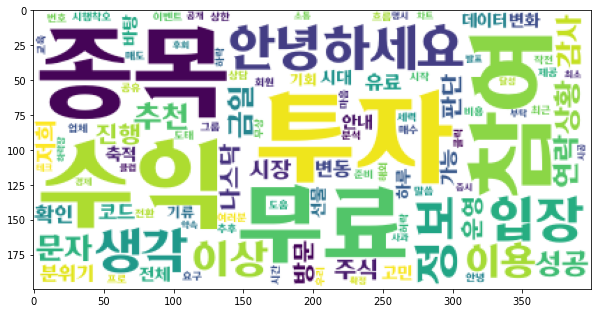

In [112]:
dobak = Counter(list(itertools.chain(*df[df["광고유형"] == "기타"]["noun"].to_list()))).most_common(100)
wc = WordCloud(font_path="/Users/jmyeong/Library/Fonts/KOTRA LEAP.otf", background_color="white", max_font_size=80)
gen = wc.generate_from_frequencies(dict(dobak))
plt.figure(figsize=(10,10))
plt.imshow(gen)
dobak[:10]

##### 부동산

[('분양', 60),
 ('가능', 55),
 ('상승', 32),
 ('일반', 31),
 ('아파트', 28),
 ('수익', 27),
 ('선착순', 26),
 ('입주', 26),
 ('역세권', 25),
 ('예약', 24)]

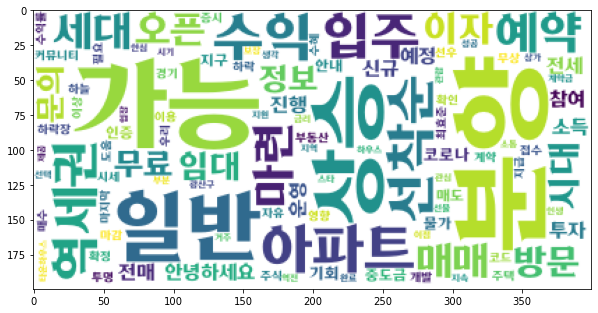

In [113]:
dobak = Counter(list(itertools.chain(*df[df["광고유형"] == "부동산"]["noun"].to_list()))).most_common(100)
wc = WordCloud(font_path="/Users/jmyeong/Library/Fonts/KOTRA LEAP.otf", background_color="white", max_font_size=80)
gen = wc.generate_from_frequencies(dict(dobak))
plt.figure(figsize=(10,10))
plt.imshow(gen)
dobak[:10]

##### 도박

[('입장', 669),
 ('무료', 657),
 ('업체', 399),
 ('안녕하세요', 368),
 ('수익', 358),
 ('운영', 355),
 ('정보', 347),
 ('번호', 339),
 ('이상', 316),
 ('종목', 313)]

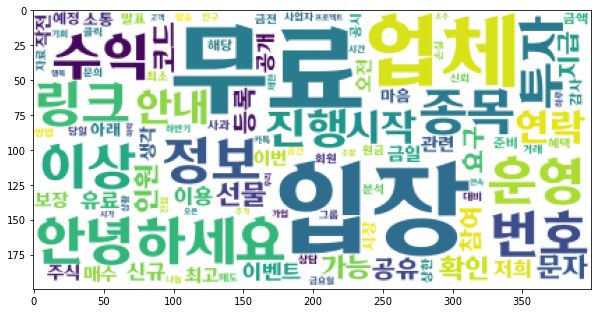

In [114]:
dobak = Counter(list(itertools.chain(*df[df["광고유형"] == "도박"]["noun"].to_list()))).most_common(100)
wc = WordCloud(font_path="/Users/jmyeong/Library/Fonts/KOTRA LEAP.otf", background_color="white", max_font_size=80)
gen = wc.generate_from_frequencies(dict(dobak))
plt.figure(figsize=(10,10))
plt.imshow(gen)
dobak[:10]

##### 주식

[('무료', 174),
 ('코드', 98),
 ('나스닥', 96),
 ('추천', 93),
 ('내일', 68),
 ('오후', 60),
 ('리딩', 58),
 ('입장', 55),
 ('전문가', 54),
 ('수익', 52)]

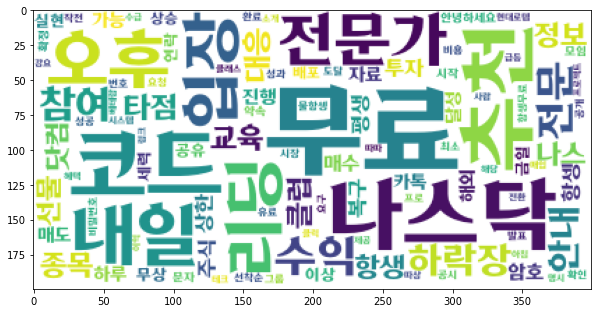

In [115]:
dobak = Counter(list(itertools.chain(*df[df["광고유형"] == "주식"]["noun"].to_list()))).most_common(100)
wc = WordCloud(font_path="/Users/jmyeong/Library/Fonts/KOTRA LEAP.otf", background_color="white", max_font_size=80)
gen = wc.generate_from_frequencies(dict(dobak))
plt.figure(figsize=(10,10))
plt.imshow(gen)
dobak[:10]

##### 성인

[('정보', 250),
 ('시장', 223),
 ('종목', 210),
 ('입장', 209),
 ('공유', 207),
 ('확인', 190),
 ('무료', 185),
 ('수익', 183),
 ('이유', 177),
 ('투자', 167)]

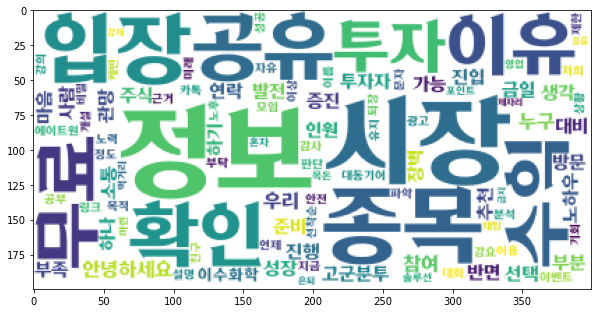

In [116]:
dobak = Counter(list(itertools.chain(*df[df["광고유형"] == "성인"]["noun"].to_list()))).most_common(100)
wc = WordCloud(font_path="/Users/jmyeong/Library/Fonts/KOTRA LEAP.otf", background_color="white", max_font_size=80)
gen = wc.generate_from_frequencies(dict(dobak))
plt.figure(figsize=(10,10))
plt.imshow(gen)
dobak[:10]

##### 불법대출

[('신청', 741),
 ('안내', 726),
 ('대출', 691),
 ('가능', 677),
 ('지원', 645),
 ('확인', 579),
 ('금리', 524),
 ('대상자', 520),
 ('자금', 518),
 ('정책', 478)]

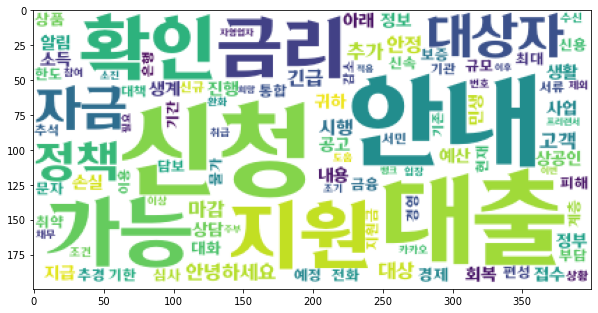

In [117]:
dobak = Counter(list(itertools.chain(*df[df["광고유형"] == "불법대출"]["noun"].to_list()))).most_common(100)
wc = WordCloud(font_path="/Users/jmyeong/Library/Fonts/KOTRA LEAP.otf", background_color="white", max_font_size=80)
gen = wc.generate_from_frequencies(dict(dobak))
plt.figure(figsize=(10,10))
plt.imshow(gen)
dobak[:10]

##### 대리운전

[('하루', 83),
 ('무료', 81),
 ('안전', 68),
 ('동안', 62),
 ('마감', 61),
 ('진입', 60),
 ('종목', 39),
 ('정보', 34),
 ('투자', 32),
 ('백만', 30)]

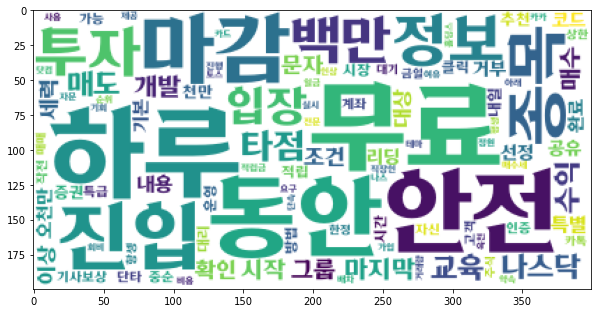

In [118]:
dobak = Counter(list(itertools.chain(*df[df["광고유형"] == "대리운전"]["noun"].to_list()))).most_common(100)
wc = WordCloud(font_path="/Users/jmyeong/Library/Fonts/KOTRA LEAP.otf", background_color="white", max_font_size=80)
gen = wc.generate_from_frequencies(dict(dobak))
plt.figure(figsize=(10,10))
plt.imshow(gen)
dobak[:10]

##### 약품

[('필름', 21),
 ('제품', 21),
 ('용량', 20),
 ('문의', 20),
 ('주문', 18),
 ('번호', 17),
 ('약국', 15),
 ('현대', 14),
 ('김성호', 14),
 ('문자', 12)]

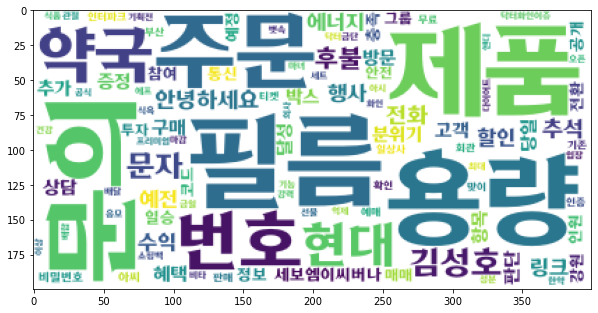

In [119]:
dobak = Counter(list(itertools.chain(*df[df["광고유형"] == "약품"]["noun"].to_list()))).most_common(100)
wc = WordCloud(font_path="/Users/jmyeong/Library/Fonts/KOTRA LEAP.otf", background_color="white", max_font_size=80)
gen = wc.generate_from_frequencies(dict(dobak))
plt.figure(figsize=(10,10))
plt.imshow(gen)
dobak[:10]

##### 통신가입

[('할인', 14),
 ('개통', 13),
 ('문자', 13),
 ('휴대폰', 10),
 ('갤럭시', 9),
 ('플립', 9),
 ('안녕하세요', 9),
 ('점프', 9),
 ('성함', 9),
 ('혜택', 7)]

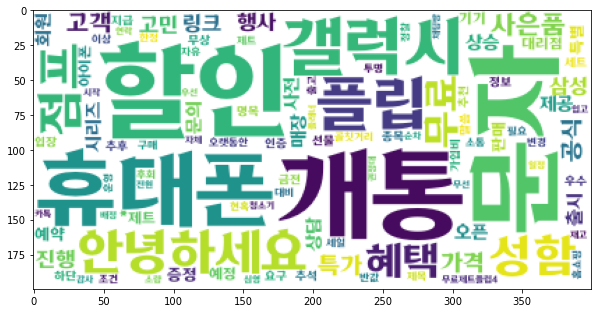

In [120]:
dobak = Counter(list(itertools.chain(*df[df["광고유형"] == "통신가입"]["noun"].to_list()))).most_common(100)
wc = WordCloud(font_path="/Users/jmyeong/Library/Fonts/KOTRA LEAP.otf", background_color="white", max_font_size=80)
gen = wc.generate_from_frequencies(dict(dobak))
plt.figure(figsize=(10,10))
plt.imshow(gen)
dobak[:10]

##### 게임

[('특별', 2),
 ('무료', 2),
 ('테라스', 2),
 ('넥슨', 1),
 ('엘소드', 1),
 ('라비', 1),
 ('라인', 1),
 ('트윈즈', 1),
 ('피카로', 1),
 ('니샤', 1)]

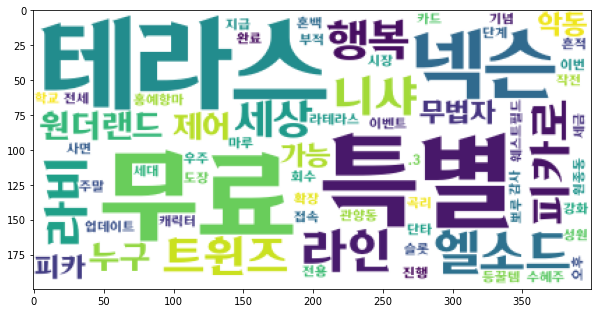

In [122]:
dobak = Counter(list(itertools.chain(*df[df["광고유형"] == "게임"]["noun"].to_list()))).most_common(100)
wc = WordCloud(font_path="/Users/jmyeong/Library/Fonts/KOTRA LEAP.otf", background_color="white", max_font_size=80)
gen = wc.generate_from_frequencies(dict(dobak))
plt.figure(figsize=(10,10))
plt.imshow(gen)
dobak[:10]

##### 확인불가

[('무료', 19),
 ('그룹', 16),
 ('선물', 12),
 ('타점', 11),
 ('목표', 10),
 ('종목', 10),
 ('공유', 10),
 ('코드', 9),
 ('입장', 8),
 ('기회', 7)]

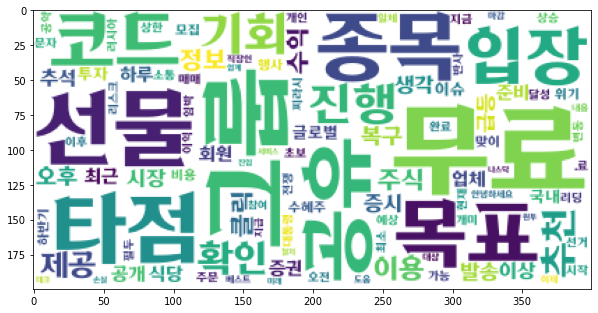

In [123]:
dobak = Counter(list(itertools.chain(*df[df["광고유형"] == "확인불가"]["noun"].to_list()))).most_common(100)
wc = WordCloud(font_path="/Users/jmyeong/Library/Fonts/KOTRA LEAP.otf", background_color="white", max_font_size=80)
gen = wc.generate_from_frequencies(dict(dobak))
plt.figure(figsize=(10,10))
plt.imshow(gen)
dobak[:10]

##### 비스팸

[('발송', 257),
 ('완료', 252),
 ('확인', 233),
 ('내용', 220),
 ('통보', 217),
 ('건강', 188),
 ('종합', 155),
 ('국민건강보험', 150),
 ('진찰', 95),
 ('검사', 72)]

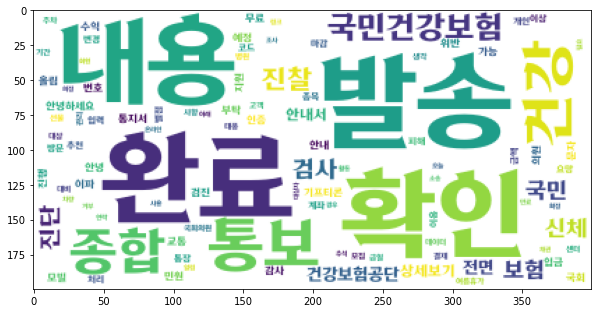

In [124]:
dobak = Counter(list(itertools.chain(*df[df["광고유형"] == "비스팸"]["noun"].to_list()))).most_common(100)
wc = WordCloud(font_path="/Users/jmyeong/Library/Fonts/KOTRA LEAP.otf", background_color="white", max_font_size=80)
gen = wc.generate_from_frequencies(dict(dobak))
plt.figure(figsize=(10,10))
plt.imshow(gen)
dobak[:10]

---

## 광고유형 재분류 ( k-means )

## tf-idf

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from pyclustering.cluster import kmedoids
import itertools

In [13]:
df_cluster = df

In [22]:
df_coin = df_cluster[df_cluster["광고유형"] == "주식"]

In [32]:
# 문장 벡터화 tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

texts = [" ".join(noun) for noun in df_coin['noun']]
words = ['']
for t in texts:
    words[0] += t

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(words)
vector = tfidf_vectorizer.transform(words)#.toarray()

word2id = defaultdict(lambda : 0)
for idx, feature in enumerate(tfidf_vectorizer.get_feature_names()):
    word2id[feature] = idx

for i, sent in enumerate(words):
    print('====== document[%d] ======' % i)
    analysis = [ (token, vector[i, word2id[token]]) for token in sent.split()  ]

sorted(analysis, key=lambda x : x[1], reverse=True)

In [18]:
tmp = df_cluster.drop_duplicates(subset="전문내용")#,inplace=True
for i in set(tmp["광고유형"].to_list()):
    if i == None:
        continue
    print(i + " : " + str(len(tmp[tmp["광고유형"]== i])) )
    
len(tmp)

주식 : 407
도박 : 2012
금융 : 72
대리운전 : 237
불법대출 : 1443
확인불가 : 65
성인 : 641
비스팸 : 349
부동산 : 184
게임 : 4
약품 : 62
유흥업소 : 29
기타 : 3571
통신가입 : 28
운세 : 1


9107

In [67]:
# k-means 군집 분석
new_df = pd.DataFrame(vector, columns=tfidf_vectorizer.get_feature_names_out())

/Users/jmyeong/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/jmyeong/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

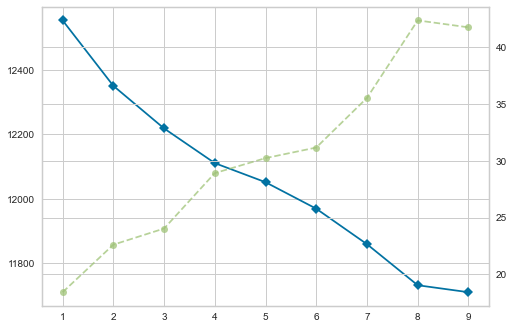

In [68]:
# k 결정
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()ㅁ
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(new_df)

In [69]:
k = 4
model = KMeans(n_clusters=k, random_state=10)
model.fit(new_df)
df_cluster["cluster"] = model.fit_predict(new_df)

In [75]:
df_cluster[["광고유형","process_text","cluster"]].to_csv("/Users/jmyeong/Desktop/test.csv")

------

In [98]:
# DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np

vector = np.array(vector)
model = DBSCAN(eps=0.5,min_samples=6, metric = "cosine")
result = model.fit_predict(vector)
df_cluster["result"] = result

In [101]:
for cluster_num in set(result):
    # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
    if(cluster_num == -1 or cluster_num == 0): 
        continue
    else:
        print("cluster num : {}".format(cluster_num))
        temp_df = df_cluster[df_cluster['result'] == cluster_num] # cluster num 별로 조회
        for title in temp_df['process_text']:
            print(title[:50]) # 제목으로 살펴보자
        print()

cluster num : 1
알려드립니다 개미들의 탈출구입장 [2222]https:volaHW8ASF
SMS-
0000알려드립니다 개미들의 탈출구입장 [2222]https:hangldaoLA
SMS-
알려드립니다 개미들의 탈출구[2222]https:volaHW8ASF
SMS-
알려드립니다 개미들의 탈출구입장 [2222]https:volaHW8ASF
SMS-
하락장속개미들의 탈출구PW 3333https:bulykr5JHEBPt
SMS-
하락장속개미들의 탈출구PW 3333https:bulykr5JHEBPt
SMS-

cluster num : 2
안녕하십니까앞으로도  변함없이  다양한 이벤트와 놀꺼리를 준비해서2전에 한번 오셨던 회윈님
안녕하십니까앞으로도  변함없이  다양한 이벤트와 놀꺼리를 준비해서2전에 한번 오셨던 회윈님
안녕하십니까앞으로도  변함없이  다양한 이벤트와 놀꺼리를 준비해서2전에 한번 오셨던 회윈님
안녕하십니까앞으로도  변함없이  다양한 이벤트와 놀꺼리를 준비해서2전에 한번 오셨던 회윈님
안녕하십니까앞으로도  변함없이  다양한 이벤트와 놀꺼리를 준비해서2전에 한번 오셨던 회윈님
안녕하십니까앞으로도  변함없이  다양한 이벤트와 놀꺼리를 준비해서2전에 한번 오셨던 회윈님
안녕하십니까앞으로도  변함없이  댜양한 이벤트와 놀꺼리를 준비해서2전에 한번 오셨던 회윈님
안녕하십니까앞으로도  변함없이  댜양한 이벤트와 놀꺼리를 준비해서2전에 한번 오셨던 회윈님
안녕하십니까앞으로도  변함없이  댜양한 이벤트와 놀꺼리를 준비해서2전에 한번 오셨던 회윈님
안녕하십니까앞으로도  변함없이  다양한 이벤트와 놀꺼리를 준비해서2전에 한번 오셨던 회윈님
안녕하십니까앞으로도  변함없이  댜양한 이벤트와 놀꺼리를 준비해서2전에 한번 오셨던 회윈님

cluster num : 3
오늘의헤어todayhairnet아이몬2200쉐모아2300헤나샴푸5200+α
SMS-
0000오늘의헤어todayhairnet아이몬2200쉐모아2300헤나샴푸5200+α
SMS
오늘의헤어todayhaircokr파

In [312]:
# k-means
from sklearn.cluster import KMeans

#문장 벡터화
desc = df["process_text"]
text = desc.to_list()

vectorize = CountVectorizer()
x = vectorize.fit_transform(text)

new_df = pd.DataFrame(x.toarray(), columns=vectorize.get_feature_names_out())

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

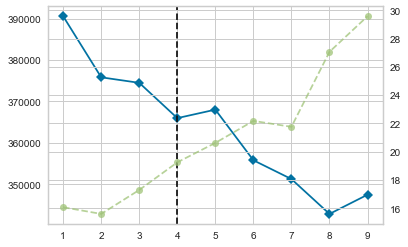

In [219]:
# k 결정 (Elbow Method)
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(new_df)

In [222]:
ad_type

{None,
 '게임',
 '금융',
 '기타',
 '대리운전',
 '도박',
 '부동산',
 '불법대출',
 '비스팸',
 '성인',
 '약품',
 '운세',
 '유흥업소',
 '주식',
 '통신가입',
 '확인불가'}

In [230]:
k = 8
model = KMeans(n_clusters = k, random_state = 10)
result = model.fit(new_df)
df_cluster['cluster'] = result.labels_

In [231]:
df_cluster[["전문내용","광고유형","cluster"]].to_csv("/Users/jmyeong/Desktop/test.csv")

In [225]:
for cluster_num in set(result.labels_):  #set(result)
    print("cluster num : {}".format(cluster_num))
    temp_df = df_cluster[df_cluster['cluster'] == cluster_num] # cluster num 별로 조회
    for title in temp_df['process_text']:
        print(title[:30]) # 제목으로 살펴보자
    print("")
    print("")

cluster num : 0
국민투자점안녕하세요 국민투자점 지사장입니다잠시만 시간내
종잣돈 3,000,000원으로 월 50,000,000 
BIT하나투자반갑습니다현재 침체중인 장 속에서도 성과를
BIT하나투자반갑습니다현재 침체중인 장 속에서도 성과를
종잣돈 3,000,000원으로 월 50,000,000 
종잣돈 3,000,000원으로 월 50,000,000 
종잣돈 3,000,000원으로 월 50,000,000 
국민투자점안녕하세요 국민투자점 지사장입니다잠시만 시간내
BT자산 아무런 능력이 없다고 생각 하지 마세요 여러분
종잣돈 3,000,000원으로 월 50,000,000 
,bit 여전히 그 자리에 계시겠습니까 역전하여 누구보
종잣돈 3,000,000원으로 월 50,000,000 
종잣돈 3,000,000원으로 월 50,000,000 
종잣돈 3,000,000원으로 월 50,000,000 
(주)라온그룹  안녕하세요하루 1분만 시간내주시면보여드
(주)라온그룹  안녕하세요하루 1분만 시간내주시면보여드
BIT기획[정보나눔센터]◆ 일일 200이상 ◆돈 인생을
,bT,c 남들이 겁을 먹고 있을 때가 욕심을 부려도 
BIT기획[정보나눔센터]안녕하세요불쑥 연락드려 죄송합니
국민 투자점안녕하세요 국민투자점 정민우 지사장입니다잠시
종잣돈 3,000,000원으로 월 50,000,000 
국민 투자점안녕하세요 국민투자점 정민우 지사장입니다잠시
종잣돈 3,000,000원으로 월 50,000,000 
종잣돈 3,000,000원으로 월 50,000,000 
종잣돈 3,000,000원으로 월 50,000,000 
0000종잣돈 3,000,000원으로 월 50,000,
종잣돈 3,000,000원으로 월 50,000,000 
종잣돈 3,000,000원으로 월 50,000,000 
종잣돈 3,000,000원으로 월 50,000,000 
종잣돈 3,000,000원으로 월 50,000,000 
종잣돈 3,000,000원으로 월 50,000,000 
[현대투자점]반갑습니다현대투자점입니다이 문

아닙니다회원님매주3등이23천명나옵니다정말당첨볼수있고 꾸
HL인베스트먼트HL인베스트 매니저 김철민입니다2022년
㈜Apex academy안녕하십니까 말씀 드리기 앞서 
8월29일295만원으로 마감 10,573,000원투자상
박종준님 안녕하세요시장에 진입장벽은 높아만 가고있습니다
빅카안녕하세요3주전정도에 메시지 보내 드렸었는데 기억 
최강혁의 코인정보BTC 13시 시작코드6070https
(UP로또)언제까지 로또 유료업체 이용하실건가요 이제는
소중한 고객님 FLO입니다고객님은 최근 1년동안 서비스
종잣돈 4,000,000원으로 월 48,625,000 
8월28일295만원으로 마감 10,573,000원투자상
(UP로또)언제까지 로또 유료업체 이용하실건가요 이제는
듀>우리메RIT카진호lex32com③만
SMS-
[유효기간] 20220829  20220928< 배달3
해,외,선,물항셍,나스닥성공을투자hanglKuldy참여
1,000,000원으로18,698,500원 완료이것 알
인플레이  츙전event 잠시후 15시 부터 총 20퍼
㈜HR유료 운영하는 방에서 손해 보신 분들 우리 방에서
코크쇼핑몰 010-5721-3140 가을 아우터 20％
(UP로또)언제까지 로또 유료업체 이용하실건가요 이제는
(UP로또)언제까지 로또 유료업체 이용하실건가요 이제는
(행복나눔)안녕하세요 저는 저는 빅데이터 딥러닝 기술로
9월 세력주14시 대공개예정일 65+@https:han
신경진님 안녕하세요시장에 진입장벽은 높아만 가고있습니다
BBQ배민에서 최대5,500원 할인8월31일까지진월중앙
[선물스쿨커뮤니티]해외선물로 눈을돌리는분들이점점많아지고
TJ투자8월 주력주 진입할겁니다 종목명 : XXX제약*
(주)투자의감각영리목적 주식방들이 활개치며 근거없는 종
st그룹산타클로스 무료방에 초대받으셨습니다1만명 이하 
정성운송157786862758님안전은기본전국으로
SM
㈜NB투자자문안내드렸던 금비[008870]당일 상한가 
방문 조건은  호응과 참여입니다꼭 지켜주셔야합니다금일 
0000안녕하세요주말 선

㈜Stock University안내드리기 앞서 동의없이
해외선물에는비가 내리지 않습니다현재주식시장의날씨는[매우
(주)임팩트전문가 종목 추천코드:5678bitly3wH
㈜동행 인베스트시장은 어려워지고만 있습니다누구는 혼자 
㈜Stock University안내드리기 앞서 동의없이
World Stock 무료 주식방을 운영하고있는 월드스
830 마지막307만원으로 마감 13,115,000원확
경제TV(주)정식 해외선물 플랫폼  현재 많은 불법 대
(주)승리전문가와 함께하락장 대비me2kridb8i 암
〃8월이 끝나갑니다한달의 마무리 즐겁게 하시라고하늘팀장
MD_그룹주식과외 무료개설과외받고 성공 하자bitly3
㈜Kevin 아카데미Kevin [주식공부하고 싶은 사람
830 마지막307만원으로 마감 13,115,000원확
황선생 매니저 김승섭 입니다 2022년에도 8년간 회원
㈜Stock University안내드리기 앞서 동의없이
WooRiSan*C∂SlN0ha9⑨sgcom가입[30,
㈜Stock University안내드리기 앞서 동의없이
MD_그룹주식과외 무료개설과외받고 성공 하자bitly3
㈜RMY company22년 8월 30일 (금일기준) 
8월30일285만원으로 마감 11,717,000원투자상
World Stock 무료 주식방을 운영하고있는 월드스
830 마지막307만원으로 마감 13,115,000원확
0000(주)승리전문가와 함께하락장 대비me2kridb
830 마지막307만원으로 마감 13,115,000원확
황선생매니저 김승섭 입니다 2022년에도 8년간 회원님
8월30일285만원으로 마감 11,717,000원투자상
MD_그룹키움 추석맞이 행사직장인 대상 급등주bitly
㈜RMY company22년 8월 30일 (금일기준) 
황선생매니저 김승섭 입니다 2022년에도 8년간 회원님
8월30일285만원으로 마감 11,717,000원투자상
㈜Kevin 아카데미Kevin [주식공부하고 싶은 사람
정보로 먹고사는 lT시대 코★드▶ 1111 https:
힘든 일상속에 

(주)BITstock 먼저 원치않는 문자였다면 죄송합니
안녕하세요휴대폰개통점입니다갤럭시점프2 무료SamSung
* 2022년도 체험학습, 진로체험, 문화체험 오시면 
Stock University안내드리기 앞서 동의없이 
위대한company위대한컴퍼니의 유성입니다요즘 급락이 
해선테크https:bitly3AD8rbQ나스닥투↓자월 
유료로 결제하는분들 꼭 읽어보세요 전부 다 공개합니다여
[국민건강보험]종합건강진단 통보서 발송완료내용확인[on
안녕하세요 빅데이터윤 영 미 라고 합니다저도 피해자였습
BTC 비용없이 상담1등전문가만나기bitly3wCKSP
손해그만보세요2,200,000으로 +14,782,000
[국민건강보험]종합건강진단 통보서 발송완료내용확인[co
[SMS]KW오후2시평생무료 상한가정보안내+28http
[국민건강보험]종합건강진단 통보서 발송완료내용확인[co
손해그만보세요2,200,000으로 +14,782,000
손해그만보세요2,200,000으로 +14,782,000
대한투자그룹 안전한 매매 꾸준한 수익 volaEOUDq
[클래스101] 고객님, [2개월 무료] 혜택은 오늘 
플레이블 X 변정수 Live 방송 D-1변정수가 유채원
삼성카드신규 기존 전부 플래너통해 신청발급해주시면발급즉
0000(대리)16000-16000적립6650원빠른접수
0000만육천16000-16000*최단거리기사연결*즉시
0000(대리)16000-16000적립6650원*즉시배
0000만육천16000-160007106님근거리기사님신
0000만육천16000-160007106님신속한배차기사
0000(대리)16000-16000적립6650원근거리기
0000만육천16000-160007106님인근 기사님바
0000만육천16000-160007106님*기사님 즉시
0000(대리)16000-16000적립6650원인근기사
0000만육천16000-160007106님가까운거리도누
0000만육천16000-160007106님베테랑기사신속
0000만육천(대리)16000-16000적립6650원빠
0000만육천1

9월2일3350,000원 하루동안12,529,000원 
대한복권센터 ♥특별체험번호 이용방법♥ 1네이버 검색창 
아_침엔자_동텐_트C_알_리스http:ctiagjgry
삼성카드[가입대상]1미성년자 만 아니면 발급가능2은행거
손해그만보세요2,400,000으로 +15,742,000
0000[교통민원24]차량법 규위반벌 점 처분 고지서 
김지학님 안녕하세요9월의 시작여전할 것인가 역전할 것인
신상구경티켓 : 666ⓑt87kr
MMS신상구경티켓 
일산장군이입니다 무더운날씨에 고생많으셨습니다 이번주도 
(행복트리)안녕하세요 lotto 분석가 최현준 입니다 
해피요가 쿠룬타 구매시무조건 신세계상품권 5만원 hap
아성오십모의금 지원 선착순 (10명) https:vvd
(행복트리)안녕하세요 lotto 분석가 최현준 입니다 
대상자알림하반기 저소득층 생계유지 지원정책 안내안녕하세
[SMS]아_침엔자_동텐_트C_알_리스http:dcnw
브라더엔터테이먼트 방갑습니다 형님 아우님들 갑작이 이렇
아_침엔자_동텐_트C_알_리스http:sxbqyjgry
성공하는 사람들은믿기 때문에 보인다믿을수 있게 만들어드
[흥국생명]문의전화 : 1588-2288장미옥고객님비대
충족한부부위한Levi트라C알1알씩먹고굵게고함량bitly
(행복트리)안녕하세요 lotto 분석가 최현준 입니다 
0000아_침엔자_동텐_트C_알_리스http:uhlci
김춘섭님사업자등록업체VIP자료공유금일600 원금보장입장
코스모스 꽃이 산들산들 롯데영등포 조순희매장 추석맞이 
아_침엔자_동텐_트C_알_리스http:azvmsjgry
9월2일3350,000원 하루동안12,529,000원 
9월2일3350,000원 하루동안12,529,000원 
세계최초비트코인동호회현재 흔들리기만하는 시장에 손 놓고
모든 정보를 무상으로 드리고 있으며, 나중에 비용결제 
세계최초비트코인동호회*현재금융인정보마당주식갤러리코인갤러
클래스카드 Julia님,비대면바우처 400만원 지원대상
손해그만보세요2,400,000으로 +15,742,000
300만원으로 진

새비케어 우선 이렇게 허락없이 형들 메시지 보내는거 미
롤드컵 우선 이렇게 허락없이 형들 메시지 보내는거 미안
새비케어 우선 이렇게 허락없이 형들 메시지 보내는거 미
롤드컵 우선 이렇게 허락없이 형들 메시지 보내는거 미안
이니에스타 우선 이렇게 허락없이 형들 메시지 보내는거 
일류인생 우선 이렇게 허락없이 형들 메시지 보내는거 미
일류인생우선 이렇게 허락없이 형들 메시지 보내는거 미안
에너빌리티 우선 이렇게 허락없이 형들 메시지 보내는거 
에너빌리티우선 이렇게 허락없이 형들 메시지 보내는거 미
일류인생 우선 이렇게 허락없이 형들 메시지 보내는거 미
에너빌리티 우선 이렇게 허락없이 형들 메시지 보내는거 
석류 우선 이렇게 허락없이 형들 메시지 보내는거 미안해
루브탱우선 이렇게 허락없이 형들 메시지 보내는거 미안해
석류우선 이렇게 허락없이 형들 메시지 보내는거 미안해우
루브탱 우선 이렇게 허락없이 형들 메시지 보내는거 미안
석류 우선 이렇게 허락없이 형들 메시지 보내는거 미안해
브이피 우선 이렇게 허락없이 형들 메시지 보내 는거 미
브이피  우선 이렇게 허락없이 형들 메시지 보내 는거 
에너빌리티우선 이렇게 허락없이 형들 메시지 보내는거 미
루브탱 우선 이렇게 허락없이 형들 메시지 보내는거 미안
브이피  우선 이렇게 허락없이 형들 메시지 보내 는거 
레이스형들 이렇게 허락도 없이 문자 보낸거 우선 사과할
스탠다드 형들 이렇게 허락도 없이 문자 보낸거 우선 사
플렉스형들 이렇게 허락도 없이 문자 보낸거 우선 사과할
샤또마고우선 이렇게 허락없이 형들 메시지 보내는거 미안
진에어 형들 이렇게 허락도 없이 문자 보낸거 우선 사과
레이스 형들 이렇게 허락도 없이 문자 보낸거 우선 사과
스테이퓨어 이렇게 허락도 안받고 문자 보내서 형들 우선
스테이퓨어이렇게 허락도 안받고 문자 보내서 형들 우선 
피아이지 이렇게 허락도 안받고 문자 보내서 형들 우선 
스테이퓨어 이렇게 허락도 안받고 문자 보내서 형들 우선
피아이지 이렇게 허락도 안받고 문자 보내서 형들 우선 
피아이지이렇게 

------------

------------

### word2vec 

In [125]:
df_cluster = df1

In [126]:
df_cluster

,receive_time,report_time,spam_type,ad_type,content,content_len,process_text,noun,noun_count
2,2021-08-07 11:20:00,2021-08-28 20:48:09,문자,부동산,"""8월 이벤트! 1타 부동산 유튜브 온라인강의”[선착순 30명 : 50% 할인]y...",65,8월 이벤트 1타 부동산 유튜브 온라인강의”[선착순 30명 : 50 할인]yout...,"[이벤트, 부동산, 유튜브, 온라인, 강의, 선착순]",6
3,2022-04-04 19:16:00,2022-04-04 22:47:24,문자,기타,"""S휘트니스 안내문""QR코드 인증중단평일 저녁12까지 연장1개월 19,000원 4/...",63,S휘트니스 안내문QR코드 인증중단평일 저녁12까지 연장1개월 19000원 427까지...,"[휘트니스, 안내문, 코드, 인증, 중단, 평일, 저녁, 연장, 선착순]",9
4,2021-12-01 13:01:00,2021-12-01 22:13:50,문자,불법대출,"""esia golf""\n\n▶회원님께 드리는 이달의 이벤트\n\n12월 BC카드로 ...",60,esia golf\n\n▶회원님께 드리는 이달의 이벤트\n\n12월 BC카드로 결제...,"[회원, 이달, 이벤트, 카드, 결제, 상당, 상품권, 추가, 증정]",9
5,2022-08-31 15:35:00,2022-08-31 19:13:15,MMS,도박,"""개업 5주년 大 이벤트""* 9/1일 목요일 휴무(전체 기계 업그레이드)* 9/...",124,개업 5주년 大 이벤트* 91일 목요일 휴무(전체 기계 업그레이드)* 9293금...,"[개업, 이벤트, 목요일, 휴무, 전체, 기계, 업그레이드, 금요일, 토요일, 최고...",15
6,2022-04-06 20:10:00,2022-04-29 20:08:44,MMS,성인,"""개천에서 용이 된 남자의 대찬도전""《제주도지사 예비후보 김용철》학교 문턱도 가보지...",126,개천에서 용이 된 남자의 대찬도전《제주도지사 예비후보 김용철》학교 문턱도 가보지 못...,"[개천, 남자, 도전, 제주, 도지사, 예비, 후보, 김용철, 학교, 문턱, 무학,...",21
...,...,...,...,...,...,...,...,...,...
99989,2021-09-13 16:57:00,2021-09-13 17:01:45,문자,기타,[Web발신]\n강연자님 지금 참여!\n변호사도 주식그만 하고\n'이것'으로 더큰성...,62,강연자님 지금 참여\n변호사도 주식그만 하고\n'이것'으로 더큰성공사례\n\n공유:...,"[강연자, 지금, 참여, 변호사, 주식, 성공, 사례, 공유]",8
99992,2021-09-27 12:12:00,2021-09-27 23:45:22,문자,기타,[Web발신]\n강영석님\n\n빠른 판단과 결정이 필요 합니다\n\n현재＋79.2%...,68,강영석님\n\n빠른 판단과 결정이 필요 합니다\n\n현재＋792\n목표＋1586\n...,"[강영석, 판단, 결정, 필요, 목표, 참여]",6
99994,2021-09-29 17:35:00,2021-09-29 17:41:42,문자,기타,[Web발신]\n강영수님\n안전하게 재산 굴리는\n방법 공개 합니다\nhttp://...,52,강영수님\n안전하게 재산 굴리는\n방법 공개 합니다\nhttp:yasgdhcom,"[강영수, 안전, 재산, 방법, 공개]",5
99997,2021-09-04 15:36:00,2021-09-04 16:36:54,문자,기타,[Web발신]\n강영우 님\n당신의목표에 한걸음\n가깝게 해드리겠습니다.\n준비되셨...,61,강영우 님\n당신의목표에 한걸음\n가깝게 해드리겠습니다\n준비되셨나요\n\nappp...,"[강영우, 당신, 목표, 한걸음, 준비]",5


In [189]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import numpy as np

result = df_cluster["noun"].to_list()
model= Word2Vec(sentences=result, window=1, min_count=3, sg=1, seed=10) 
'''
size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
window = 컨텍스트 윈도우 크기
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
workers = 학습을 위한 프로세스 수
sg = 0은 CBOW, 1은 Skip-gram.

CBOW : 한 문자에서 연속적인 단어들을 입력값으로 집어 넣는 것으로 문맥을 통해 단어를 예측할 수 있는 모델
Skip-Gram : 한 문장 안에서 발생할 수 있는 단어 모음을 모두 입력값으로 취하기에 단어를 통해 문맥을 예측할 수 있는 모델
'''

'\nsize = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.\nwindow = 컨텍스트 윈도우 크기\nmin_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)\nworkers = 학습을 위한 프로세스 수\nsg = 0은 CBOW, 1은 Skip-gram.\n\nCBOW : 한 문자에서 연속적인 단어들을 입력값으로 집어 넣는 것으로 문맥을 통해 단어를 예측할 수 있는 모델\nSkip-Gram : 한 문장 안에서 발생할 수 있는 단어 모음을 모두 입력값으로 취하기에 단어를 통해 문맥을 예측할 수 있는 모델\n'

In [181]:
model.wv.vectors.shape

(13510, 100)

In [190]:
model.wv.most_similar("건강")

[('질병', 0.7285608649253845),
 ('감기', 0.665962815284729),
 ('평안', 0.6546598672866821),
 ('환절기', 0.6080929040908813),
 ('가정', 0.6020561456680298),
 ('건강보험공단', 0.6020364165306091),
 ('짜증', 0.5958896279335022),
 ('겉옷', 0.5946117043495178),
 ('보름달', 0.5901817083358765),
 ('빗길', 0.5851351618766785)]

In [191]:
# word2vec으로 벡터화 시키기
def get_sentence_mean_vector(morphs):
    vector = []
    for i in morphs:
        try:
            vector.append(model.wv[i])
        except KeyError as e:
            pass
    try:
        return np.mean(vector, axis=0)
    except IndexError as e:
        pass

df_cluster['wv'] = df_cluster["noun"].map(get_sentence_mean_vector)

In [192]:
df_cluster = df_cluster[df_cluster["wv"].map(lambda x: x.size == 100)]

In [193]:
df_cluster = df_cluster.reset_index().drop("index", axis=1)

In [196]:
from sklearn.cluster import KMeans

word_vectors = df_cluster.wv.to_list()
num_clusters = 11

# K-means 를 정의하고 학습시킨다.
kmeans_clustering = KMeans( n_clusters = num_clusters, random_state=10 )
df_cluster["category"] = kmeans_clustering.fit_predict(word_vectors)
df_cluster.category.value_counts()

10    12088
7     10105
0      9889
4      9157
5      8009
6      7666
8      5265
2      3158
9      2952
3      1150
1      1052
Name: category, dtype: int64

In [160]:
'''
도박
부동산
비스팸
성인
약품
주식
피싱
가상화폐
기타
대출
확인불가
'''

'\n도박\n부동산\n비스팸\n성인\n약품\n주식\n피싱\n가상화폐\n기타\n대출\n확인불가\n'

In [112]:
df_cluster.columns

Index(['receive_time', 'report_time', 'spam_type', 'ad_type', 'content',
       'content_len', 'process_text', 'noun', 'noun_count', 'wv', 'category'],
      dtype='object')

In [161]:
## csv 저장
df_cluster.drop(["content_len","noun_count","wv"], axis=1).to_csv("/Users/jmyeong/Desktop/spam_test.csv")

### 2차 분류

In [20]:
df_cluster.reset_index(inplace=True)

In [21]:
## 지도학습

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_cluster["wv_list"] = df_cluster["wv"].apply(lambda x : x.tolist())

X_train = df_cluster["wv_list"].to_list()
X_test = df_cluster[df_cluster["category"] == 0]["wv_list"].to_list()
y_train = df_cluster["category"].to_list()
y_test = df_cluster[df_cluster["category"] == 0]["category"].to_list()

# 3차 분류
# X_train = df_cluster["wv_list"].to_list()
# X_test = tmp[tmp["predict"] == 0]["wv_list"].to_list()
# y_train = df_cluster["category"].to_list()
# y_test = df_cluster[df_cluster["predict"] == 0]["category"].to_list()


classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/var/folders/jp/nrj6zk491wv9npgslcl58jf00000gn/T/ipykernel_21135/4275829410.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster["wv_list"] = df_cluster["wv"].apply(lambda x : x.tolist())
/Users/jmyeong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
tmp = df_cluster[df_cluster["category"] == 0]
tmp["predict"] = classifier.predict(X_test)

# tmp_2 = tmp[tmp["predict"] == 0]
# tmp_2["predict"] = classifier.predict(X_test)


/var/folders/jp/nrj6zk491wv9npgslcl58jf00000gn/T/ipykernel_21135/584787704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["predict"] = classifier.predict(X_test)


In [23]:
tmp

,index,수신시간,신고시간,스팸유형,광고유형,전문내용,process_text,noun,sign,noun_count,wv,category,wv_list,predict
5,5,2022.08.26 15:36,2022.08.29 00:53:22,MMS,도박,[Web발신]안녕하세요! 빅데이터안 성 민 라고 합니다저도 피해자였습니다 지켜만볼수...,안녕하세요 빅데이터안 성 민 라고 합니다저도 피해자였습니다 지켜만볼수없어서 제가만든...,"[안녕하세요, 빅데이터, 피해자, 프로그램, 여러분, 무료, 모두, 유료, 업체, ...","[https, bitly, 001, kakao, MMS]",19,"[-0.14236717, -0.11255515, -0.20148289, -0.104...",0,"[-0.1423671692609787, -0.11255515366792679, -0...",0
11,11,2022.08.20 13:20,2022.08.29 00:52:05,MMS,기타,[Web발신](광고) 크리스찬디올 안녕하세요 2주전 쯤에도 문자 보내 드렸는데 기억...,크리스찬디올 안녕하세요 2주전 쯤에도 문자 보내 드렸는데 기억 나시는지 모르겠습니다...,"[크리스찬, 안녕하세요, 문자, 기억, 그날, 주기, 예정, 말씀, 믿음, 메시지,...",[],36,"[-0.15412226, 0.2112877, -0.10490134, -0.28334...",0,"[-0.1541222631931305, 0.2112877070903778, -0.1...",0
21,21,2022.08.28 20:22,2022.08.29 00:50:15,MMS,기타,[Web발신](광고)PLAY&마카우 가을의 시작 일교차가 심해지는 만큼 오늘 하루도...,PLAY&마카우 가을의 시작 일교차가 심해지는 만큼 오늘 하루도 건강 조심하시길 ...,"[마카우, 가을, 시작, 일교차, 하루, 건강, 조심, 보안, 신경, 분별, 각종,...","[PLAY, ＿＿＿＿＿＿＿＿＿＿＿, Major, FC, Event, Game, 20...",31,"[-0.14507858, 0.08089319, -0.118260115, -0.087...",0,"[-0.14507858455181122, 0.08089318871498108, -0...",0
26,26,2022.08.28 17:41,2022.08.29 00:49:05,MMS,기타,[Web발신](광고)역대급해외공원 일할 땐 열심히!! 응원할땐 더 열심히!! 오늘하...,역대급해외공원 일할 땐 열심히 응원할땐 더 열심히 오늘하루도 건승하시길 바랍니다 ＿...,"[역대, 해외, 공원, 응원, 하루, 업체, 회원, 착각, 운영, 시작, 보안, 신...","[＿＿＿＿＿＿＿＿＿＿＿, da, com]",36,"[-0.17332348, 0.08722829, -0.124896735, -0.082...",0,"[-0.17332348227500916, 0.08722829073667526, -0...",0
30,30,2022.08.28 20:24,2022.08.29 00:45:16,MMS,기타,[Web발신](광고)PLAY&마카우가을의 시작 일교차가심해지는 만큼 오늘 하루도 건...,PLAY&마카우가을의 시작 일교차가심해지는 만큼 오늘 하루도 건강 조심하시길 바랍니...,"[&마카우, 가을, 시작, 일교차, 하루, 건강, 조심, 보안, 신경, 분별, 각종...","[PLAY, ＿＿＿＿＿＿＿＿＿＿＿, ＿＿＿＿＿＿＿＿＿＿＿ⓛ, Major, FC, E...",32,"[-0.1631984, 0.047730193, -0.11784373, -0.0844...",0,"[-0.16319839656352997, 0.04773019254207611, -0...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9094,9094,2022.08.25 16:03,2022.09.04 23:46:03,MMS,기타,(광고)(계열종합공지)아직도 못 고르셨나요?사장님 이제 고민하지마세요제가 그 고민 ...,(계열종합공지)아직도 못 고르셨나요사장님 이제 고민하지마세요제가 그 고민 해결해드립...,"[계열, 종합, 공지, 사장, 고민, 해결, 이곳저곳, 연락, 비교, 차이]",[MMS],10,"[-0.18666992, -0.008360909, -0.1585047, 0.0432...",0,"[-0.18666991591453552, -0.008360909298062325, ...",0
9096,9096,2022.08.21 20:34,2022.09.04 23:45:28,MMS,기타,(광고)필독안내그동안 저희계열을 이용해주신특별한선생님들을 또한번 모시게됫습니다문자받...,필독안내그동안 저희계열을 이용해주신특별한선생님들을 또한번 모시게됫습니다문자받으신분들...,"[필독, 그동안, 저희, 계열, 이용, 특별, 선생, 모시게됫, 문자, 아래, 정보...","[⑶+, ⑸+, ⑽+, MMS]",14,"[-0.35600612, 0.09683834, -0.11713592, -0.1556...",0,"[-0.35600611567497253, 0.0968383401632309, -0....",0
9101,9101,2022.09.04 22:29,2022.09.04 23:30:53,MMS,기타,[Web발신](광고)(주)조이홀딩스입니다. 01085851857님 3둥당첨 축하드립...,(주)조이홀딩스입니다 01085851857님 3둥당첨 축하드립니다 영수증 사진 부탁...,"[조이, 홀딩스, 당첨, 축하, 영수증, 사진, 부탁, 일품, 로또, 고객, 센터,...","[01085851857, 15330714, 0800900700, MMS]",14,"[-0.17773043, 0.10065486, -0.21369062, -0.1742...",0,"[-0.17773042619228363, 0.10065486282110214, -0...",0
9104,9104,2022.08.20 12:38,2022.09.04 23:20:14,MMS,기타,[Web발신](광고)라메르안녕하세요 2주전 쯤에도 문자 보내 드렸는데 기억 나시는지...,라메르안녕하세요 2주전 쯤에도 문자 보내 드렸는데 기억 나시는지 모르겠습니다믿으시는...,"[라메르, 안녕하세요, 문자, 기억, 그날, 주기, 예정, 말씀, 저희, 기간, 동...","[10, 30]",33,"[-0.12739569, 0.189821, -0.08196861, -0.191670...",0,"[-0.12739568948745728, 0.1898210048675537, -0....",0


In [27]:
from collections import Counter
Counter(tmp["predict"].tolist())

Counter({0: 3049, 1: 8, 2: 22})

In [28]:
tmp[["광고유형","process_text","category","predict"]].to_csv("/Users/jmyeong/Desktop/predict_test.csv")

In [11]:
tmp = df_cluster.drop_duplicates(subset="전문내용")#,inplace=True
for i in set(tmp["광고유형"].to_list()):
    if i == None:
        continue
    print(i + " : " + str(len(tmp[tmp["광고유형"]== i])) )
    
len(tmp)

주식 : 407
도박 : 2012
금융 : 72
대리운전 : 237
불법대출 : 1443
확인불가 : 65
성인 : 641
비스팸 : 349
부동산 : 184
게임 : 4
약품 : 62
유흥업소 : 29
기타 : 3571
통신가입 : 28
운세 : 1


9107

In [94]:
tmp = df_cluster_2.drop_duplicates(subset="전문내용")#,inplace=True
for i in set(tmp["광고유형"].to_list()):
    if i == None:
        continue
    print(i + " : " + str(len(tmp[tmp["광고유형"]== i])) )
    
len(tmp)

주식 : 23
도박 : 878
약품 : 52
대리운전 : 73
불법대출 : 221
게임 : 3
성인 : 167
비스팸 : 91
부동산 : 137
금융 : 7
통신가입 : 26
유흥업소 : 29
기타 : 1350
확인불가 : 11
운세 : 1


3069

---

In [122]:
# 주식
df_coin = df_cluster[df_cluster["category"] == 2]

In [125]:
start = []
words = ['']
for i in df_coin["noun"]:
    start += i 
for i in set(start):
    words[0] += i + ' '
words[0] = words[0].strip()

In [139]:
from collections import Counter

Counter(list(itertools.chain(*(df_coin["noun"].tolist())))).most_common()

[('입장', 1747),
 ('수익', 1741),
 ('종목', 1659),
 ('무료', 1636),
 ('투자', 1533),
 ('정보', 1398),
 ('참여', 1255),
 ('시장', 935),
 ('주식', 932),
 ('이상', 901),
 ('금일', 843),
 ('진행', 833),
 ('추천', 803),
 ('공유', 759),
 ('안녕하세요', 748),
 ('코드', 692),
 ('상황', 646),
 ('확인', 644),
 ('생각', 629),
 ('성공', 593),
 ('가능', 564),
 ('연락', 555),
 ('나스닥', 534),
 ('선물', 527),
 ('인원', 518),
 ('문자', 500),
 ('기회', 478),
 ('요구', 473),
 ('공개', 458),
 ('매수', 452),
 ('방문', 450),
 ('작전', 449),
 ('무상', 446),
 ('판단', 431),
 ('그룹', 429),
 ('시작', 418),
 ('세력', 416),
 ('저희', 400),
 ('오전', 396),
 ('안내', 387),
 ('분위기', 387),
 ('운영', 385),
 ('이용', 382),
 ('소통', 380),
 ('링크', 379),
 ('유료', 376),
 ('상한', 375),
 ('시대', 375),
 ('관망', 372),
 ('감사', 370),
 ('하루', 369),
 ('최소', 368),
 ('발표', 364),
 ('하락', 355),
 ('해외', 346),
 ('보장', 345),
 ('매도', 344),
 ('진입', 342),
 ('하락장', 341),
 ('변화', 340),
 ('공시', 340),
 ('교육', 338),
 ('변동', 329),
 ('고민', 321),
 ('전환', 320),
 ('평생', 317),
 ('선착순', 317),
 ('달성', 316),
 ('손실', 316),
 ('바탕', 309),
 ('상승'

In [126]:
# 문장 벡터화 tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

# texts = [" ".join(noun) for noun in df_cluster['noun']]
# words = ['','']
# for t in texts:
#     words[0] += t
# words[1] += set(words[0].split(" "))

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(words)
vector = tfidf_vectorizer.transform(words)#.toarray()

word2id = defaultdict(lambda : 0)
for idx, feature in enumerate(tfidf_vectorizer.get_feature_names()):
    word2id[feature] = idx

for i, sent in enumerate(words):
    print('====== document[%d] ======' % i)
    analysis = [ (token, vector[i, word2id[token]]) for token in sent.split() ]

====== document[0] ======


/Users/jmyeong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [127]:
sorted(analysis, key=lambda x : x[1], reverse=True)

[('엔지켐', 0.03561222848978813),
 ('네옴', 0.03561222848978813),
 ('광림', 0.03561222848978813),
 ('지아이텍', 0.03561222848978813),
 ('구조', 0.017806114244894065),
 ('변수', 0.017806114244894065),
 ('제외', 0.017806114244894065),
 ('화성벨브', 0.017806114244894065),
 ('강화', 0.017806114244894065),
 ('마이더스', 0.017806114244894065),
 ('예상', 0.017806114244894065),
 ('김지은', 0.017806114244894065),
 ('입회', 0.017806114244894065),
 ('증거', 0.017806114244894065),
 ('과거', 0.017806114244894065),
 ('차이', 0.017806114244894065),
 ('관람', 0.017806114244894065),
 ('무엇', 0.017806114244894065),
 ('비밀번호', 0.017806114244894065),
 ('패배', 0.017806114244894065),
 ('정상', 0.017806114244894065),
 ('파생', 0.017806114244894065),
 ('장흥', 0.017806114244894065),
 ('수단', 0.017806114244894065),
 ('엄선', 0.017806114244894065),
 ('매입', 0.017806114244894065),
 ('알림', 0.017806114244894065),
 ('영웅', 0.017806114244894065),
 ('익일', 0.017806114244894065),
 ('한진', 0.017806114244894065),
 ('전자', 0.017806114244894065),
 ('바랍', 0.017806114244894065),
 (

In [99]:
df_ssrg = df_cluster[df_cluster["category"] == 0]

In [93]:
df_ssrg

,수신시간,신고시간,스팸유형,광고유형,전문내용,process_text,noun,sign,noun_count,wv,category
8,2022.08.26 15:36,2022.08.29 00:53:22,MMS,도박,[Web발신]안녕하세요! 빅데이터안 성 민 라고 합니다저도 피해자였습니다 지켜만볼수...,안녕하세요 빅데이터안 성 민 라고 합니다저도 피해자였습니다 지켜만볼수없어서 제가만든...,"[안녕하세요, 빅데이터, 피해자, 프로그램, 여러분, 무료, 모두, 유료, 업체, ...","[https, bitly, 001, kakao, MMS]",19,"[-0.1483183, -0.11000969, -0.20795093, -0.1101...",0
14,2022.08.20 13:20,2022.08.29 00:52:05,MMS,기타,[Web발신](광고) 크리스찬디올 안녕하세요 2주전 쯤에도 문자 보내 드렸는데 기억...,크리스찬디올 안녕하세요 2주전 쯤에도 문자 보내 드렸는데 기억 나시는지 모르겠습니다...,"[크리스찬, 안녕하세요, 문자, 기억, 그날, 주기, 예정, 말씀, 믿음, 메시지,...",[],36,"[-0.15498382, 0.20534106, -0.10573831, -0.2833...",0
24,2022.08.28 20:22,2022.08.29 00:50:15,MMS,기타,[Web발신](광고)PLAY&마카우 가을의 시작 일교차가 심해지는 만큼 오늘 하루도...,PLAY&마카우 가을의 시작 일교차가 심해지는 만큼 오늘 하루도 건강 조심하시길 ...,"[마카우, 가을, 시작, 일교차, 하루, 건강, 조심, 보안, 신경, 분별, 각종,...","[PLAY, ＿＿＿＿＿＿＿＿＿＿＿, Major, FC, Event, Game, 20...",31,"[-0.14448212, 0.08202917, -0.12569545, -0.0824...",0
29,2022.08.28 17:41,2022.08.29 00:49:05,MMS,기타,[Web발신](광고)역대급해외공원 일할 땐 열심히!! 응원할땐 더 열심히!! 오늘하...,역대급해외공원 일할 땐 열심히 응원할땐 더 열심히 오늘하루도 건승하시길 바랍니다 ＿...,"[역대, 해외, 공원, 응원, 하루, 업체, 회원, 착각, 운영, 시작, 보안, 신...","[＿＿＿＿＿＿＿＿＿＿＿, da, com]",36,"[-0.17276314, 0.08660058, -0.12735674, -0.0817...",0
38,2022.08.28 20:24,2022.08.29 00:45:16,MMS,기타,[Web발신](광고)PLAY&마카우가을의 시작 일교차가심해지는 만큼 오늘 하루도 건...,PLAY&마카우가을의 시작 일교차가심해지는 만큼 오늘 하루도 건강 조심하시길 바랍니...,"[&마카우, 가을, 시작, 일교차, 하루, 건강, 조심, 보안, 신경, 분별, 각종...","[PLAY, ＿＿＿＿＿＿＿＿＿＿＿, ＿＿＿＿＿＿＿＿＿＿＿ⓛ, Major, FC, E...",32,"[-0.16291793, 0.04966829, -0.1253314, -0.07882...",0
...,...,...,...,...,...,...,...,...,...,...,...
95034,2022.08.25 16:03,2022.09.04 23:46:03,MMS,기타,(광고)(계열종합공지)아직도 못 고르셨나요?사장님 이제 고민하지마세요제가 그 고민 ...,(계열종합공지)아직도 못 고르셨나요사장님 이제 고민하지마세요제가 그 고민 해결해드립...,"[계열, 종합, 공지, 사장, 고민, 해결, 이곳저곳, 연락, 비교, 차이]",[MMS],10,"[-0.1859128, -0.0086367475, -0.16887212, 0.038...",0
95041,2022.08.21 20:34,2022.09.04 23:45:28,MMS,기타,(광고)필독안내그동안 저희계열을 이용해주신특별한선생님들을 또한번 모시게됫습니다문자받...,필독안내그동안 저희계열을 이용해주신특별한선생님들을 또한번 모시게됫습니다문자받으신분들...,"[필독, 그동안, 저희, 계열, 이용, 특별, 선생, 모시게됫, 문자, 아래, 정보...","[⑶+, ⑸+, ⑽+, MMS]",14,"[-0.35398653, 0.093004145, -0.12924324, -0.148...",0
95083,2022.09.04 22:29,2022.09.04 23:30:53,MMS,기타,[Web발신](광고)(주)조이홀딩스입니다. 01085851857님 3둥당첨 축하드립...,(주)조이홀딩스입니다 01085851857님 3둥당첨 축하드립니다 영수증 사진 부탁...,"[조이, 홀딩스, 당첨, 축하, 영수증, 사진, 부탁, 일품, 로또, 고객, 센터,...","[01085851857, 15330714, 0800900700, MMS]",14,"[-0.17827103, 0.10680879, -0.22446111, -0.1779...",0
95114,2022.08.20 12:38,2022.09.04 23:20:14,MMS,기타,[Web발신](광고)라메르안녕하세요 2주전 쯤에도 문자 보내 드렸는데 기억 나시는지...,라메르안녕하세요 2주전 쯤에도 문자 보내 드렸는데 기억 나시는지 모르겠습니다믿으시는...,"[라메르, 안녕하세요, 문자, 기억, 그날, 주기, 예정, 말씀, 저희, 기간, 동...","[10, 30]",33,"[-0.12925586, 0.18456857, -0.081571095, -0.192...",0
